In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Fuente externa - United Nations Statistics Division (UNSD),
df_tabaco= pd.read_excel("./Tabaco- United Nations Statistics Division.xlsx")
df_tabaco.head()

,ref_area_desc,iso3,time_period,indicator_id,"Age-standardized prevalence of current tobacco use among persons aged 15 years and older, by sex",sex_desc
0,Afghanistan,AFG,2000,Ic68a22f4,36.9,Both sexes or no breakdown by sex
1,Afghanistan,AFG,2000,Ic68a22f4,55.3,Male
2,Afghanistan,AFG,2000,Ic68a22f4,18.4,Female
3,Afghanistan,AFG,2005,Ic68a22f4,50.8,Male
4,Afghanistan,AFG,2005,Ic68a22f4,14.5,Female


In [3]:
# Cambio nombres de algunas columnas en el df, para que coincida con el df de WB.
df_tabaco.rename(columns={"ref_area_desc": "Country"}, inplace=True)
df_tabaco.rename(columns={"iso3": "Country_Code"}, inplace=True)
df_tabaco.rename(columns={"time_period": "Año"}, inplace=True)
df_tabaco.rename(columns={"sex_desc": "Gender"}, inplace=True)
df_tabaco

,Country,Country_Code,Año,indicator_id,"Age-standardized prevalence of current tobacco use among persons aged 15 years and older, by sex",Gender
0,Afghanistan,AFG,2000,Ic68a22f4,36.9,Both sexes or no breakdown by sex
1,Afghanistan,AFG,2000,Ic68a22f4,55.3,Male
2,Afghanistan,AFG,2000,Ic68a22f4,18.4,Female
3,Afghanistan,AFG,2005,Ic68a22f4,50.8,Male
4,Afghanistan,AFG,2005,Ic68a22f4,14.5,Female
...,...,...,...,...,...,...
3439,Zambia,ZMB,2019,Ic68a22f4,3.9,Female
3440,Zambia,ZMB,2019,Ic68a22f4,25.3,Male
3441,Zambia,ZMB,2020,Ic68a22f4,25.1,Male
3442,Zambia,ZMB,2020,Ic68a22f4,3.7,Female


In [4]:
# Filtro los paises de la OEA
Countries =['ATG','ARG','BRB','BLZ','BOL','BRA','CAN','CHL','COL','CRI','CUB','DMA','DOM','ECU','SLV','GRD','GTM',
          'GUY','HTI','HND','JAM','MEX','NIC','PAN','PRY','PER','KNA','LCA','VCT','SUR','BHS','TTO','USA','URY','VEN']
df_tabaco_filtrado = df_tabaco[df_tabaco["Country_Code"].isin(Countries)]
df_tabaco_filtrado

,Country,Country_Code,Año,indicator_id,"Age-standardized prevalence of current tobacco use among persons aged 15 years and older, by sex",Gender
105,Argentina,ARG,2000,Ic68a22f4,34.0,Both sexes or no breakdown by sex
106,Argentina,ARG,2000,Ic68a22f4,28.4,Female
107,Argentina,ARG,2000,Ic68a22f4,39.6,Male
108,Argentina,ARG,2005,Ic68a22f4,36.9,Male
109,Argentina,ARG,2005,Ic68a22f4,26.0,Female
...,...,...,...,...,...,...
3355,Uruguay,URY,2019,Ic68a22f4,22.0,Both sexes or no breakdown by sex
3356,Uruguay,URY,2019,Ic68a22f4,18.8,Female
3357,Uruguay,URY,2020,Ic68a22f4,24.4,Male
3358,Uruguay,URY,2020,Ic68a22f4,18.5,Female


In [5]:
df_tabaco_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 105 to 3359
Data columns (total 6 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Country                                                                                           504 non-null    object 
 1   Country_Code                                                                                      504 non-null    object 
 2   Año                                                                                               504 non-null    int64  
 3   indicator_id                                                                                      504 non-null    object 
 4   Age-standardized prevalence of current tobacco use among persons aged 15 years and older, by sex  504 non-null    float64
 5   Gend

In [6]:
df_tabaco_filtrado.describe()

,Año,"Age-standardized prevalence of current tobacco use among persons aged 15 years and older, by sex"
count,504.000000,504.000000
mean,2012.428571,16.475000
std,7.115551,10.363348
min,2000.000000,1.600000
25%,2005.000000,8.675000
50%,2015.000000,15.000000
75%,2019.000000,23.025000
max,2020.000000,54.900000


In [7]:
# Cuentos los nulos
df_tabaco_filtrado.isnull().sum()

Country                                                                                             0
Country_Code                                                                                        0
Año                                                                                                 0
indicator_id                                                                                        0
Age-standardized prevalence of current tobacco use among persons aged 15 years and older, by sex    0
Gender                                                                                              0
dtype: int64

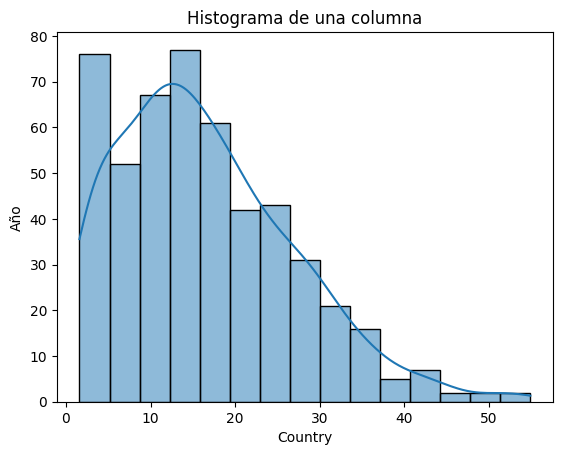

In [8]:
sns.histplot(data=df_tabaco_filtrado, x='Age-standardized prevalence of current tobacco use among persons aged 15 years and older, by sex', kde=True)
plt.xlabel('Country')
plt.ylabel('Año')
plt.title('Histograma de una columna')
plt.show()


In [ ]:
df_tabaco_filtrado.to_csv('consumo_tabaco.csv', index=False)